In [53]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
all_files = os.listdir('/data/johlee/Maggies_cross_kingdom/mz_expData')
maize_data_files = [i for i in all_files if 'exp' in i]
maize_data_files

['expDataSRP076626.csv',
 'expDataSRP079776.csv',
 'expDataERP009123.csv',
 'expDataSRP079373.csv',
 'expDataERP011069.csv',
 'expDataSRP081262.csv',
 'expDataERP011664.csv',
 'expDataSRP082328.csv',
 'expDataERP011838.csv',
 'expDataSRP082329.csv',
 'expDataERP012784.csv',
 'expDataSRP096470.csv',
 'expDataERP015295.csv',
 'expDataSRP096479.csv',
 'expDataERP021168.csv',
 'expDataSRP097037.csv',
 'expDataERP024506.csv',
 'expDataSRP100763.csv',
 'expDataSRP006965.csv',
 'expDataSRP101622.csv',
 'expDataSRP011480.csv',
 'expDataSRP101911.csv',
 'expDataSRP011560.csv',
 'expDataSRP102142.csv',
 'expDataSRP013432.csv',
 'expDataSRP104197.csv',
 'expDataSRP018088.csv',
 'expDataSRP105366.csv',
 'expDataSRP026161.csv',
 'expDataSRP105764.csv',
 'expDataSRP026399.csv',
 'expDataSRP106663.csv',
 'expDataSRP028231.csv',
 'expDataSRP108309.csv',
 'expDataSRP030121.csv',
 'expDataSRP109003.csv',
 'expDataSRP031872.csv',
 'expDataSRP109545.csv',
 'expDataSRP033653.csv',
 'expDataSRP111105.csv',


In [5]:
test_maize_file = maize_data_files[34]
test_maize_file

'expDataSRP030121.csv'

In [7]:
current_file = '/data/johlee/Maggies_cross_kingdom/mz_expData/' + test_maize_file
test_maize_data = pd.read_csv(current_file)


In [67]:
def read_in_and_get_coeff_of_var(file_name, ranktype="reg"):
    current_file = '/data/johlee/Maggies_cross_kingdom/mz_expData/' + file_name
    test_maize_data = pd.read_csv(current_file)
    ranked_maize_test = test_maize_data.rank()
    ranked_coef_variance = ranked_maize_test.var(axis = 1)/ranked_maize_test.mean(axis =1)
    
    sum_maize = test_maize_data.sum(axis = 1)
    zero_in_expt = test_maize_data.loc[sum_maize==0].index
    ranked_coef_variance.loc[zero_in_expt] = np.nan

    return ranked_coef_variance


In [68]:
ranked_coef_df_all_expt = pd.DataFrame(index = test_maize_data.index,)

for file in maize_data_files:
    ranked_coef_df_all_expt[file] = read_in_and_get_coeff_of_var(file)

In [69]:
count_nan = ranked_coef_df_all_expt.isnull().sum(axis =1)

In [74]:
ranked_coef_df_all_expt

,expDataSRP076626.csv,expDataSRP079776.csv,expDataERP009123.csv,expDataSRP079373.csv,expDataERP011069.csv,expDataSRP081262.csv,expDataERP011664.csv,expDataSRP082328.csv,expDataERP011838.csv,expDataSRP082329.csv,...,expDataSRP068333.csv,expDataSRP069080.csv,expDataSRP072207.csv,expDataSRP072496.csv,expDataSRP091462.csv,expDataSRP095130.csv,expDataSRP095179.csv,expDataSRP095256.csv,expDataSRP096450.csv,expDataSRP096452.csv
103644366,44.957443,222.601843,74.971198,234.033249,48.179963,122.073476,354.941273,68.261870,536.690560,15.848557,...,85.801745,150.620959,30.402011,474.957671,45.809727,101.777184,279.623233,64.900884,76.029466,82.722158
100382519,50.041041,279.129258,2.815289,1.012147,0.335099,697.791479,124.172476,44.480275,93.425175,148.862734,...,30.820304,330.690254,4.785874,2683.261296,0.082581,104.434643,17.595705,676.537141,103.000149,108.246624
109943572,271.273444,1167.338888,3990.072781,865.346590,820.043766,781.281066,1365.697555,420.727719,2349.894244,124.379155,...,611.277497,4096.680328,783.149670,954.070202,402.957127,132.956774,322.194441,423.280449,4080.595203,3578.354778
103630195,2147.328345,671.408684,4088.850159,761.811388,4283.676581,43.717450,58.915068,481.429701,2688.274982,861.209155,...,569.893560,6145.832705,544.303809,541.040613,1610.805577,73.692761,7042.839447,19.802133,6076.807811,5589.770166
103630223,10.406160,325.501913,2245.868671,2.967415,16.614857,205.469206,193.310174,92.494403,556.540042,13.218512,...,155.168635,1568.401755,7.038573,1132.758951,32.196720,80.103427,151.045542,1569.124563,1614.151691,680.207309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100283797,63.798555,38.750779,637.471776,35.300451,235.492983,60.662000,1068.315953,98.277337,510.886713,42.732797,...,9.769067,67.979672,21.777145,107.005692,0.018583,60.374918,157.922286,482.948706,38.599391,30.193700
103646008,84.267517,282.393519,13.851020,23.391443,17.907708,96.613108,279.680378,50.615745,316.669644,44.967453,...,37.327141,170.720960,17.881089,1445.761547,107.979483,48.383346,52.657503,107.296320,30.573085,47.043069
100277867,33.400307,612.354103,869.427103,164.673730,720.547040,392.342419,1245.754360,181.995187,936.214021,288.084878,...,799.172115,206.448351,736.623900,404.011468,1400.352158,494.385430,602.934825,129.966686,857.639462,778.209947
103632393,NaN,184.854504,718.744908,514.299469,271.717099,163.078802,1160.033152,788.964078,1085.250062,614.685440,...,173.513901,509.122038,644.080924,1121.919093,324.761858,NaN,733.435586,351.089046,665.392155,531.656989


In [73]:
ranked_coef_df_all_expt_confident_genes = ranked_coef_df_all_expt.loc[count_nan<69]
ranked_coef_df_all_expt_confident_genes

,expDataSRP076626.csv,expDataSRP079776.csv,expDataERP009123.csv,expDataSRP079373.csv,expDataERP011069.csv,expDataSRP081262.csv,expDataERP011664.csv,expDataSRP082328.csv,expDataERP011838.csv,expDataSRP082329.csv,...,expDataSRP068333.csv,expDataSRP069080.csv,expDataSRP072207.csv,expDataSRP072496.csv,expDataSRP091462.csv,expDataSRP095130.csv,expDataSRP095179.csv,expDataSRP095256.csv,expDataSRP096450.csv,expDataSRP096452.csv
103644366,44.957443,222.601843,74.971198,234.033249,48.179963,122.073476,354.941273,68.261870,536.690560,15.848557,...,85.801745,150.620959,30.402011,474.957671,45.809727,101.777184,279.623233,64.900884,76.029466,82.722158
100382519,50.041041,279.129258,2.815289,1.012147,0.335099,697.791479,124.172476,44.480275,93.425175,148.862734,...,30.820304,330.690254,4.785874,2683.261296,0.082581,104.434643,17.595705,676.537141,103.000149,108.246624
109943572,271.273444,1167.338888,3990.072781,865.346590,820.043766,781.281066,1365.697555,420.727719,2349.894244,124.379155,...,611.277497,4096.680328,783.149670,954.070202,402.957127,132.956774,322.194441,423.280449,4080.595203,3578.354778
103630195,2147.328345,671.408684,4088.850159,761.811388,4283.676581,43.717450,58.915068,481.429701,2688.274982,861.209155,...,569.893560,6145.832705,544.303809,541.040613,1610.805577,73.692761,7042.839447,19.802133,6076.807811,5589.770166
103630223,10.406160,325.501913,2245.868671,2.967415,16.614857,205.469206,193.310174,92.494403,556.540042,13.218512,...,155.168635,1568.401755,7.038573,1132.758951,32.196720,80.103427,151.045542,1569.124563,1614.151691,680.207309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100283797,63.798555,38.750779,637.471776,35.300451,235.492983,60.662000,1068.315953,98.277337,510.886713,42.732797,...,9.769067,67.979672,21.777145,107.005692,0.018583,60.374918,157.922286,482.948706,38.599391,30.193700
103646008,84.267517,282.393519,13.851020,23.391443,17.907708,96.613108,279.680378,50.615745,316.669644,44.967453,...,37.327141,170.720960,17.881089,1445.761547,107.979483,48.383346,52.657503,107.296320,30.573085,47.043069
100277867,33.400307,612.354103,869.427103,164.673730,720.547040,392.342419,1245.754360,181.995187,936.214021,288.084878,...,799.172115,206.448351,736.623900,404.011468,1400.352158,494.385430,602.934825,129.966686,857.639462,778.209947
103632393,NaN,184.854504,718.744908,514.299469,271.717099,163.078802,1160.033152,788.964078,1085.250062,614.685440,...,173.513901,509.122038,644.080924,1121.919093,324.761858,NaN,733.435586,351.089046,665.392155,531.656989


In [76]:
ranked_coef_df_all_expt_confident_genes.mean(axis =1)

103644366     229.637671
100382519     376.695677
109943572    1658.386412
103630195    2263.454097
103630223     870.584799
                ...     
100283797     225.343429
103646008     245.200553
100277867     760.382233
103632393     743.205939
103627805     942.606960
Length: 27245, dtype: float64

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

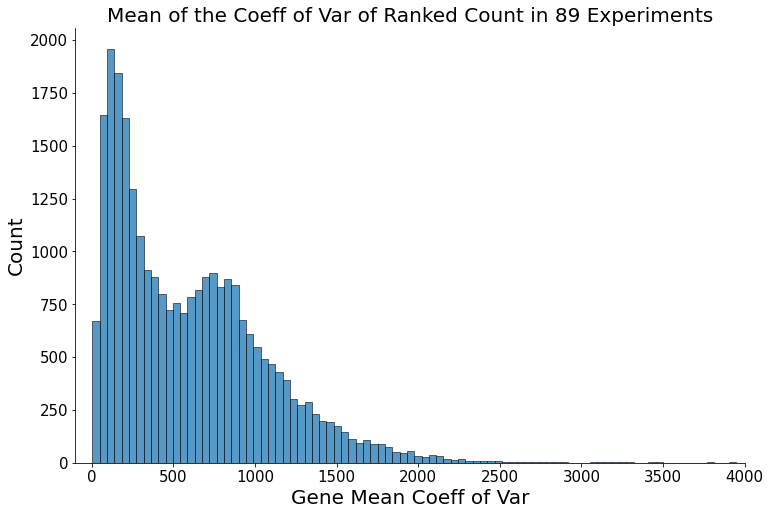

In [85]:

fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(ranked_coef_df_all_expt_confident_genes.mean(axis =1))
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Gene Mean Coeff of Var", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((-100,4000))
# plt.ylim((0, 1250))
plt.title("Mean of the Coeff of Var of Ranked Count in 89 Experiments", fontsize = 20)
plt.xticks(fontsize = 15,)
plt.yticks(fontsize = 15)

In [88]:
summary_df = pd.DataFrame(ranked_coef_df_all_expt.mean(axis =1), columns = ['Mean Coef of Variance']) 
summary_df

,Mean Coef of Variance
103644366,229.637671
100382519,376.695677
109943572,1658.386412
103630195,2263.454097
103630223,870.584799
...,...
100283797,225.343429
103646008,245.200553
100277867,760.382233
103632393,743.205939


In [89]:
summary_df['Number of Missing Experiments'] = count_nan
summary_df

,Mean Coef of Variance,Number of Missing Experiments
103644366,229.637671,0
100382519,376.695677,0
109943572,1658.386412,2
103630195,2263.454097,1
103630223,870.584799,0
...,...,...
100283797,225.343429,0
103646008,245.200553,0
100277867,760.382233,2
103632393,743.205939,6


<AxesSubplot:xlabel='Mean Coef of Variance', ylabel='Number of Missing Experiments'>

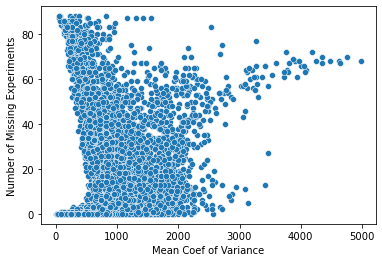

In [94]:
sns.scatterplot(data = summary_df, x = 'Mean Coef of Variance',y = 'Number of Missing Experiments')